# Different Approaches to Defining Neural Networks with Keras and TensorFlow

[TensorFlow](https://www.tensorflow.org/) 2.0 came with many new exciting updates. One of these updates was full integration with the very popular [Keras API](https://keras.io/) for developing deep learning models. Before TensorFlow 2.0, you had two install TensorfFlow and Keras separately. Now, Keras comes as a submodule of TensorFlow (*i.e.*, tensorflow.keras). We will be using Keras and TensorFlow on the majority of tutorials in this class. There are 3 ways to define Neural Networks with Keras. In this tutorial we will cover these different ways.

The learning goals of this tutorial are:
    - Introduce the Keras sequential API, functional API and model subclassing methods for defining neural networks;
    - Illustrate a simple classiifcation problem using the Iris dataset.


# Importing Python Libraries 

If you get an error that a library is not installed, most libraries you can stall on a jupyter notebook by creating a new cell and typing:

- *! pip install library_name*


In [7]:
%matplotlib inline 
import tensorflow as tf
from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_iris  # Function for loading the Iris dataset
from sklearn.model_selection import train_test_split # Function for splitting the dataset

# Data exploration

In [8]:
# Load the dataset and return to the defined variable 
dataset = load_iris()

In [9]:
# Load iris data into a DataFrame
dframe = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# add "target_label" column to the dataset and name it "label"
dframe['labels'] = dataset.target.astype(int) # Labels are represented as integers
# use of String label
dframe['label_names'] = dframe.labels.replace(dict(enumerate(dataset.target_names)))

In [10]:
# Prints the 5 first rows/samples of the dataset
dframe.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
# Generates a short description of the dataset (missing values, mean values, etc.)
dframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Train, Validation and Test Sets Split

In [12]:
# Extracting the features and labels from the dataset 
X = np.asarray(dframe[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
Y = np.asarray(dframe['labels'])

# First we will shuffle the samples
indexes = np.arange(X.shape[0])
np.random.shuffle(indexes)
X = X[indexes,:]
Y = Y[indexes]

# Then, we split our data into train/val/test sets
train_split = int(0.5*Y.size)
val_split = int(0.75*Y.size)

X_train = X[:train_split,:]
Y_train = Y[:train_split]

X_val = X[train_split:val_split,:]
Y_val = Y[train_split:val_split]

X_test = X[val_split:,:]
Y_test = Y[val_split:]

## Data Normalization

In [13]:
# min-max data normalization
x_train_min = X_train.min(axis = 0, keepdims = True)
x_train_max = X_train.max(axis = 0, keepdims = True)

X_train = (X_train - x_train_min)/(x_train_max - x_train_min)
X_val = (X_val - x_train_min)/(x_train_max - x_train_min)
X_test = (X_test - x_train_min)/(x_train_max - x_train_min)


#####################################################################################
#Activity suggestion:
# 1. Change the min-max normalization above by standardization ((X - mean)/(std))
# 2. Don't normalize the data and see what happens
####################################################################################

## Representing Labels using one-hot-ecoding

In [14]:
k = np.unique(Y).size
Y_oh_train = to_categorical(Y_train, k) 
Y_oh_val = to_categorical(Y_val, k) 
Y_oh_test = to_categorical(Y_test, k)
# Displaying the 5 first elemnts
print('Y_train[:5]:')
print(Y_train[:5])
print('\nY_oh_train[:5]=')
print(Y_oh_train[:5])

Y_train[:5]:
[2 1 2 1 1]

Y_oh_train[:5]=
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [15]:
print( "Size of X_train : " , X_train.shape)
print( "Size of X_val : " , X_val.shape)
print( "Size of X_test : " , X_test.shape)

Size of X_train :  (75, 4)
Size of X_val :  (37, 4)
Size of X_test :  (38, 4)


## Different Approaches for Defining Neural Networks

### 1. The Sequential API

In [16]:
from tensorflow.keras.models import Sequential 
# Passing a list of layers to the constructor
model = Sequential([
    tf.keras.layers.Dense(5, activation='relu', input_shape=(4,) , name = "layer1"),
    tf.keras.layers.Dense(10, activation='relu' , name = "layer2"),
    tf.keras.layers.Dense(3, activation='softmax', name = "layer3"),
])
model.summary()

/Users/elahehbeheshti/anaconda3/envs/Elaenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 5)              │            25 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118 (472.00 B)

 Trainable params: 118 (472.00 B)

 Non-trainable params: 0 (0.00 B)

### 2. The Functional API

In [17]:
from tensorflow.keras.models import Model
# This returns a tensor
input_tensor = tf.keras.layers.Input(shape=(4,))
# A layer instance is callable on a tensor, and returns a tensor
x1 = tf.keras.layers.Dense(5, activation='relu')(input_tensor)
x2 = tf.keras.layers.Dense(10, activation='relu')(x1)
out_tensor = tf.keras.layers.Dense(3, activation='softmax')(x2)
# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=input_tensor, outputs=out_tensor)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │            25 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118 (472.00 B)

 Trainable params: 118 (472.00 B)

 Non-trainable params: 0 (0.00 B)

## 3. Model Subclassing 

In [18]:
class MyNeuralNetwork(Model):
    def __init__(self, **kwargs):
        super(MyNeuralNetwork, self).__init__(**kwargs)
        self.dense1 = tf.keras.layers.Dense(5, activation='relu', )
        self.dense2 = tf.keras.layers.Dense(10, activation='relu')
        self.dense3 = tf.keras.layers.Dense(3, activation='softmax')
        
    def call(self, inputs):
        x1 = self.dense1(inputs)
        x2 = self.dense2(x1)
        out_tensor = self.dense3(x2)
        return out_tensor
model = MyNeuralNetwork()
model.build(input_shape = (None,4))
model.summary()

/Users/elahehbeheshti/anaconda3/envs/Elaenv/lib/python3.12/site-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'my_neural_network', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "my_neural_network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Training and Testing the Model

In [43]:
model.compile(optimizer='Adam',loss='CategoricalCrossentropy', metrics=['accuracy']) # compiling the model


In [44]:
# training the model 
history = model.fit(X_train, Y_oh_train, validation_data=(X_val,Y_oh_val),batch_size= 64, epochs= 300)

Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9859 - loss: 0.0543 - val_accuracy: 0.9730 - val_loss: 0.0861
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9859 - loss: 0.0500 - val_accuracy: 0.9730 - val_loss: 0.0826
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9859 - loss: 0.0532 - val_accuracy: 0.9730 - val_loss: 0.0778
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9859 - loss: 0.0477 - val_accuracy: 0.9730 - val_loss: 0.0753
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9859 - loss: 0.0516 - val_accuracy: 0.9730 - val_loss: 0.0740
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9859 - loss: 0.0527 - val_accuracy: 0.9730 - val_loss: 0.0730
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9911 - loss: 0.0465 - val_accuracy: 0.9730 - val_loss: 0.0735
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9859 - loss: 0.0501 - val_accuracy: 0.9730 - val_loss:

Test loss (cross-entropy and accuracy): [0.05900157243013382, 1.0]

Layer 0
Bias:
 [ 0.1745636  1.2076811  0.        -0.7952937  0.       ]
W:
 [[ 0.35755596  0.37945923  0.64488566  0.07558414 -0.41537645]
 [ 1.0046449   1.1198564  -0.25251877  0.2461701  -0.16563714]
 [ 1.3992227  -1.155738   -0.7318742   0.3717284   0.350801  ]
 [ 1.7800508  -0.8447154  -0.19414121  1.0198727  -0.79429144]]

Layer 1
Bias:
 [-0.49823162  0.62319416  0.          0.3224988   0.3127699   0.69510394
  0.9995105   0.32992834 -0.6452316   0.81076664]
W:
 [[ 1.1746211   0.47633862 -0.22896728  0.15708627 -0.5338948   0.81359833
   0.1433356   0.13865292  0.6703797   0.38433895]
 [-1.8780364  -0.4804814   0.00961113  0.33998638  0.87671113 -0.94256455
   1.5631548   1.1056542  -1.674646   -0.5563976 ]
 [-0.27186242  0.22376794 -0.27913696 -0.10208017  0.6080583  -0.37011498
  -0.5798321  -0.2862551   0.22965187  0.24916863]
 [ 1.19525    -1.3393729   0.24580574  1.0258756  -0.10264865  1.3663026
  -0.9531292

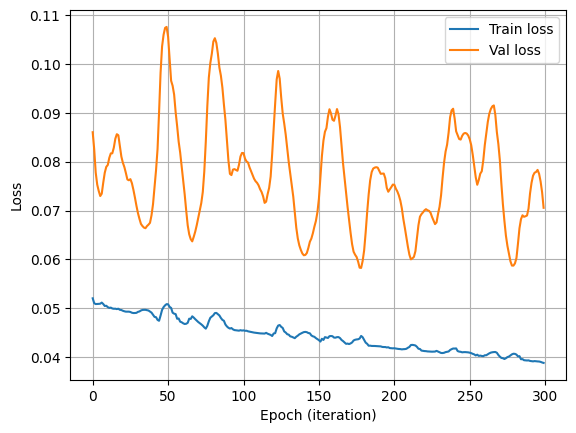

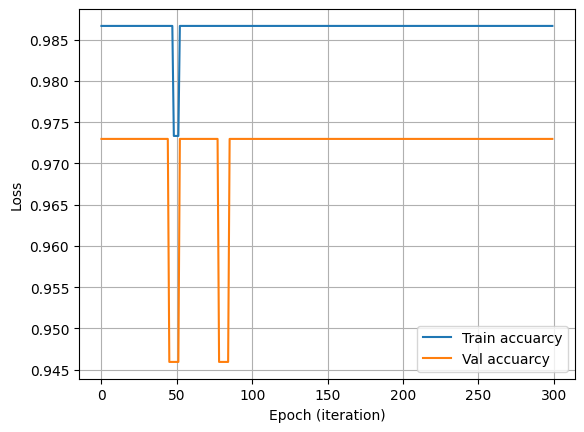

In [45]:
loss = model.evaluate(X_test, Y_oh_test, verbose=0)
print('Test loss (cross-entropy and accuracy):',loss)
print()
W = model.get_weights()
for ii in range(len(W)//2):
    print("Layer %d" %ii)
    print('Bias:\n', W[2*ii + 1])
    print('W:\n', W[2*ii])
    print()

plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# References for creating this jupyter notebook 

1) https://keras.io/guides/functional_api/

2) https://keras.io/api/models/sequential/

3) https://keras.io/api/models/

4) https://towardsdatascience.com/3-ways-to-create-a-machine-learning-model-with-keras-and-tensorflow-2-0-de09323af4d3